In [1]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [189]:
homeless=pd.read_csv('homeless_charter_2014.csv')
homeless.head()

,BEDS,Name,Borough,NumHomeless
0,320700860957,ACADEMIC LEADERSHIP CHARTER SCHOOL,BRONX,32
1,343000860998,ACADEMY OF THE CITY CHARTER SCHOOL,QUEENS,17
2,331900860933,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,KINGS,16
3,331900860993,ACHIEVEMENT FIRST ASPIRE CHARTER SCHOOL,KINGS,12
4,331900861072,ACHIEVEMENT FIRST BROOKLYN ACADEMY CHARTER SCHOOL,KINGS,16


In [191]:
scores=pd.read_csv('scores_charter_2014.csv')
scores.head()

,Name,ELA_NumTested,ELA_L1,ELA_L2,ELA_L3,ELA_L4,ELA_meanscore,M_NumTested,M_L1,M_L2,M_L3,M_L4,M_meanscore
0,ACADEMIC LEADERSHIP CHARTER SCHOOL,154,37,58,50,9,306.2792,153,20,52,49,32,318.0196
1,ACADEMY OF THE CITY CHARTER SCHOOL,56,27,16,13,0,285.5714,56,26,15,10,5,289.8750
2,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,130,32,58,38,2,303.3385,131,16,68,36,11,306.0229
3,ACHIEVEMENT FIRST BROWNSVILLE CHARTER SCHOOL,325,59,151,93,22,307.6554,326,42,112,123,49,314.3589
4,ACHIEVEMENT FIRST BUSHWICK CHARTER SCHOOL,531,94,252,143,42,307.3898,530,41,147,198,144,326.5075


In [192]:
income=pd.read_csv('income_zip_2014.csv')
income.head()

,zip,total,sub10k,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-60,60-75,75-100,100-125,125-150,150-200,above200
0,6390,132,0,1,1,0,0,0,0,1,0,3,7,0,15,22,54,28
1,10001,11169,894,463,664,314,355,239,336,417,440,505,554,1253,856,513,1076,2290
2,10002,32550,5110,3651,2698,2418,1488,1503,1216,1008,1003,2047,2444,2250,1533,1456,952,1773
3,10003,27564,1765,587,1014,854,760,578,448,811,606,1368,2116,3183,2507,1849,3320,5798
4,10004,1580,33,20,39,23,0,73,20,40,11,71,29,206,239,111,163,502


In [193]:
zipcode=pd.read_csv('school_beds_zipcode.csv')
zipcode.head()

,ATS_code,Location Name,BEDS Number,Managed By Name,Zip
0,NaN,Amani Charter School,6.609009e+11,Charter,10522
1,NaN,"Victory Schools, DBA The Charter School of Exc...",NaN,Charter,10701
2,NaN,The Academy Charter School,NaN,Charter,11550
3,NaN,EverGreen Charter School,NaN,Charter,11561
4,01M015,P.S. 015 Roberto Clemente,3.101000e+11,DOE,10009


In [194]:
homeless_zip=pd.merge(homeless, zipcode, left_on='BEDS', right_on='BEDS Number', how='left')
homeless_zip.head()

,BEDS,Name,Borough,NumHomeless,ATS_code,Location Name,BEDS Number,Managed By Name,Zip
0,320700860957,ACADEMIC LEADERSHIP CHARTER SCHOOL,BRONX,32,84X491,Academic Leadership Charter School,3.207009e+11,Charter,10454
1,343000860998,ACADEMY OF THE CITY CHARTER SCHOOL,QUEENS,17,84Q359,Academy of the City Charter School,3.430009e+11,Charter,11377
2,331900860933,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,KINGS,16,84K774,Achievement First Apollo Charter School,3.319009e+11,Charter,11208
3,331900860993,ACHIEVEMENT FIRST ASPIRE CHARTER SCHOOL,KINGS,12,84K680,Achievement First Aspire Charter School,3.319009e+11,Charter,11208
4,331900861072,ACHIEVEMENT FIRST BROOKLYN ACADEMY CHARTER SCHOOL,KINGS,16,84K788,Achievement First Linden Elementary School,3.319009e+11,Charter,11207


In [195]:
income['psub10'] = income['sub10k']/income['total']*100
income['p1015'] = income['10-15']/income['total']*100
income['p1520'] = income['15-20']/income['total']*100
income['p2025'] = income['20-25']/income['total']*100
income['p2530'] = income['25-30']/income['total']*100
income['ppov']=(income['psub10']+income['p1015']+income['p1520']+income['p2025']+income['p2530'])/income['total']*100
poverty = income[['zip', 'psub10','p1015','p1520','p2025','p2530','ppov']]
poverty.head()

,zip,psub10,p1015,p1520,p2025,p2530,ppov
0,6390,0.000000,0.757576,0.757576,0.000000,0.000000,1.147842
1,10001,8.004298,4.145402,5.945026,2.811353,3.178440,0.215637
2,10002,15.698925,11.216590,8.288786,7.428571,4.571429,0.145021
3,10003,6.403280,2.129589,3.678711,3.098244,2.757220,0.065546
4,10004,2.088608,1.265823,2.468354,1.455696,0.000000,0.460663


In [196]:
school_poverty=pd.merge(homeless_zip, poverty, left_on='Zip', right_on='zip', how='left')
school_poverty=school_poverty.drop(['Zip','BEDS Number'],1)
school_poverty.head()

,BEDS,Name,Borough,NumHomeless,ATS_code,Location Name,Managed By Name,zip,psub10,p1015,p1520,p2025,p2530,ppov
0,320700860957,ACADEMIC LEADERSHIP CHARTER SCHOOL,BRONX,32,84X491,Academic Leadership Charter School,Charter,10454,24.873828,14.491709,11.647841,9.004246,5.695746,0.526423
1,343000860998,ACADEMY OF THE CITY CHARTER SCHOOL,QUEENS,17,84Q359,Academy of the City Charter School,Charter,11377,6.297461,4.874019,5.865345,4.864487,5.693769,0.087679
2,331900860933,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,KINGS,16,84K774,Achievement First Apollo Charter School,Charter,11208,20.603032,6.299104,7.677464,5.051688,5.292901,0.154804
3,331900860993,ACHIEVEMENT FIRST ASPIRE CHARTER SCHOOL,KINGS,12,84K680,Achievement First Aspire Charter School,Charter,11208,20.603032,6.299104,7.677464,5.051688,5.292901,0.154804
4,331900861072,ACHIEVEMENT FIRST BROOKLYN ACADEMY CHARTER SCHOOL,KINGS,16,84K788,Achievement First Linden Elementary School,Charter,11207,19.555738,8.550303,5.700202,6.597573,5.782356,0.145937


In [197]:
scores['lowELApct'] = scores['ELA_L1']/scores['ELA_NumTested']*100
scores['lowMathpct'] = scores['M_L1']/scores['M_NumTested']*100
scores = scores[['lowELApct','lowMathpct','ELA_meanscore','M_meanscore','Name','ELA_NumTested','M_NumTested']]
scores.head()

,lowELApct,lowMathpct,ELA_meanscore,M_meanscore,Name,ELA_NumTested,M_NumTested
0,24.025974,13.071895,306.2792,318.0196,ACADEMIC LEADERSHIP CHARTER SCHOOL,154,153
1,48.214286,46.428571,285.5714,289.8750,ACADEMY OF THE CITY CHARTER SCHOOL,56,56
2,24.615385,12.213740,303.3385,306.0229,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,130,131
3,18.153846,12.883436,307.6554,314.3589,ACHIEVEMENT FIRST BROWNSVILLE CHARTER SCHOOL,325,326
4,17.702448,7.735849,307.3898,326.5075,ACHIEVEMENT FIRST BUSHWICK CHARTER SCHOOL,531,530


In [198]:
school_all=pd.merge(school_poverty, scores, left_on='Name', right_on='Name', how='left')
school_all=school_all.drop('Location Name',1)
school_all['phomeless_M']=school_all['NumHomeless']/school_all['M_NumTested']*100
school_all['phomeless_ELA']=school_all['NumHomeless']/school_all['ELA_NumTested']*100
school_all.head(30)

,BEDS,Name,Borough,NumHomeless,ATS_code,Managed By Name,zip,psub10,p1015,p1520,...,p2530,ppov,lowELApct,lowMathpct,ELA_meanscore,M_meanscore,ELA_NumTested,M_NumTested,phomeless_M,phomeless_ELA
0,320700860957,ACADEMIC LEADERSHIP CHARTER SCHOOL,BRONX,32,84X491,Charter,10454,24.873828,14.491709,11.647841,...,5.695746,0.526423,24.025974,13.071895,306.2792,318.0196,154,153,20.915033,20.779221
1,343000860998,ACADEMY OF THE CITY CHARTER SCHOOL,QUEENS,17,84Q359,Charter,11377,6.297461,4.874019,5.865345,...,5.693769,0.087679,48.214286,46.428571,285.5714,289.8750,56,56,30.357143,30.357143
2,331900860933,ACHIEVEMENT FIRST APOLLO CHARTER SCHOOL,KINGS,16,84K774,Charter,11208,20.603032,6.299104,7.677464,...,5.292901,0.154804,24.615385,12.213740,303.3385,306.0229,130,131,12.213740,12.307692
3,331900860993,ACHIEVEMENT FIRST ASPIRE CHARTER SCHOOL,KINGS,12,84K680,Charter,11208,20.603032,6.299104,7.677464,...,5.292901,0.154804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,331900861072,ACHIEVEMENT FIRST BROOKLYN ACADEMY CHARTER SCHOOL,KINGS,16,84K788,Charter,11207,19.555738,8.550303,5.700202,...,5.782356,0.145937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,332300860912,ACHIEVEMENT FIRST BROWNSVILLE CHARTER SCHOOL,KINGS,27,84K626,Charter,11233,17.117219,9.783432,7.557171,...,4.891716,0.172163,18.153846,12.883436,307.6554,314.3589,325,326,8.282209,8.307692
6,333200860906,ACHIEVEMENT FIRST BUSHWICK CHARTER SCHOOL,KINGS,27,84K538,Charter,11237,12.713541,5.556555,6.839297,...,4.729365,0.217050,17.702448,7.735849,307.3898,326.5075,531,530,5.094340,5.084746
7,331700860879,ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL,KINGS,35,84K356,Charter,11203,11.036666,5.573553,5.238551,...,5.371079,0.120927,23.279352,15.618661,301.0425,312.7140,494,493,7.099391,7.085020
8,331900860880,ACHIEVEMENT FIRST EAST NEW YORK CHARTER SCHOOL,KINGS,28,84K358,Charter,11207,19.555738,8.550303,5.700202,...,5.782356,0.145937,16.309013,11.182796,307.2146,318.9247,466,465,6.021505,6.008584
9,331300860902,ACHIEVEMENT FIRST ENDEAVOR CHARTER SCHOOL,KINGS,54,84K508,Charter,11238,6.834329,4.389138,4.955760,...,2.244693,0.099206,20.754717,10.823529,304.1910,318.0918,424,425,12.705882,12.735849


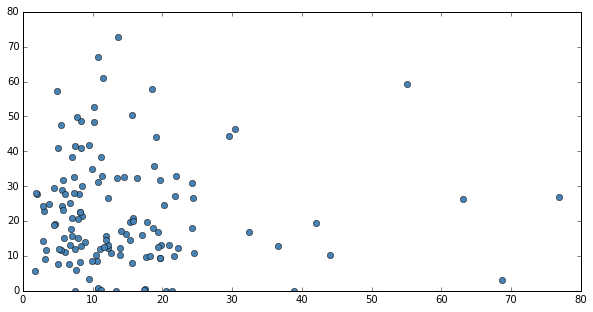

In [200]:
fig = pl.figure(7,figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(school_all['phomeless_M'], school_all['lowMathpct'], 'o', color='SteelBlue')

In [201]:
import statsmodels.formula.api as sm
model = sm.ols(formula='lowMathpct ~ phomeless_M', data=school_all) 
fit = model.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:             lowMathpct   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.05613
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.813
Time:                        02:05:42   Log-Likelihood:                -536.73
No. Observations:                 129   AIC:                             1077.
Df Residuals:                     127   BIC:                             1083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      22.5980      2.135     10.585      

In [202]:
model2 = sm.ols(formula='lowELApct ~ phomeless_ELA', data=school_all) 
fit = model2.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:              lowELApct   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.445
Date:                Wed, 16 Dec 2015   Prob (F-statistic):             0.0658
Time:                        02:05:45   Log-Likelihood:                -522.05
No. Observations:                 129   AIC:                             1048.
Df Residuals:                     127   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        26.7254      1.895     14.103

In [204]:
model3 = sm.ols(formula='lowMathpct ~ psub10', data=school_all) 
fit = model3.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:             lowMathpct   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4739
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.492
Time:                        02:06:46   Log-Likelihood:                -526.69
No. Observations:                 127   AIC:                             1057.
Df Residuals:                     125   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.5397      4.211      4.402      0.0

In [205]:
model4 = sm.ols(formula='lowMathpct ~ ppov', data=school_all) 
fit = model4.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:             lowMathpct   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                  0.009249
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.924
Time:                        02:06:52   Log-Likelihood:                -526.93
No. Observations:                 127   AIC:                             1058.
Df Residuals:                     125   BIC:                             1064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     21.1275      2.108     10.025      0.0

In [214]:
ps_scores=pd.read_csv('scores_PS_2014.csv')
ps=pd.merge(ps_scores, zipcode, left_on='DBN', right_on='ATS_code', how='left')
ps=pd.merge(ps,poverty,left_on='Zip',right_on='zip',how='left')
ps['lowELApct'] = ps['ELA_L1']/ps['ELA_numtested']*100
ps['lowMathpct'] = ps['M_L1']/ps['M_numtested']*100
ps = ps.dropna()
ps.head()

,DBN,Name,M_numtested,M_mean,M_L1,M_L2,M_L3,M_L4,ELA_numtested,ELA_mean,...,Zip,zip,psub10,p1015,p1520,p2025,p2530,ppov,lowELApct,lowMathpct
0,01M015,P.S. 015 ROBERTO CLEMENTE,63,278.0317,32,25,4,2,63,278.9048,...,10009,10009,11.316142,7.451440,5.797053,3.697254,3.891494,0.107680,60.317460,50.793651
1,01M019,P.S. 019 ASHER LEVY,104,307.8558,27,33,28,16,103,301.2427,...,10003,10003,6.403280,2.129589,3.678711,3.098244,2.757220,0.065546,30.097087,25.961538
2,01M020,P.S. 020 ANNA SILVER,233,297.7682,86,67,50,30,229,289.6157,...,10002,10002,15.698925,11.216590,8.288786,7.428571,4.571429,0.145021,44.978166,36.909871
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,264,297.7727,89,102,57,16,264,291.5682,...,10009,10009,11.316142,7.451440,5.797053,3.697254,3.891494,0.107680,36.742424,33.712121
4,01M063,THE STAR ACADEMY - P.S.63,53,300.7358,14,22,11,6,51,290.0000,...,10009,10009,11.316142,7.451440,5.797053,3.697254,3.891494,0.107680,31.372549,26.415094


In [223]:
model4 = sm.ols(formula='lowELApct ~ ppov', data=ps) 
fit = model4.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:              lowELApct   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     57.80
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           6.20e-14
Time:                        02:15:19   Log-Likelihood:                -4711.5
No. Observations:                1105   AIC:                             9427.
Df Residuals:                    1103   BIC:                             9437.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     29.7709      0.971     30.673      0.0

In [229]:
model5 = sm.ols(formula='lowMathpct ~ psub10', data=ps) 
fit = model5.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:             lowMathpct   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     447.2
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           1.37e-83
Time:                        02:18:17   Log-Likelihood:                -4695.3
No. Observations:                1105   AIC:                             9395.
Df Residuals:                    1103   BIC:                             9405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.2313      1.149     11.516      0.0

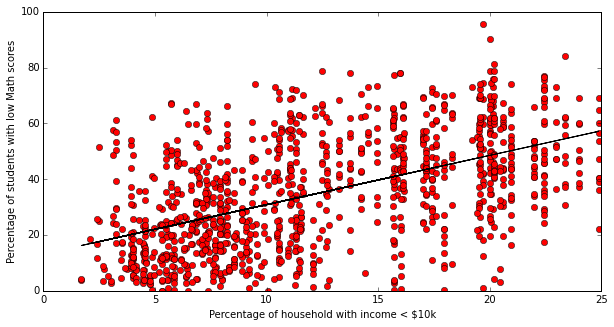

In [230]:
fig = pl.figure(7,figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(ps['psub10'],ps['lowMathpct'], 'o', color='red')
ax.plot(ps.psub10,fit.predict(),'k')
pl.ylabel('Percentage of students with low Math scores')
pl.xlabel('Percentage of household with income < $10k')